In [1]:
import re
import nltk

In [2]:
import re
import nltk
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [4]:
train  = pd.read_csv('dataset/train.csv')
test = pd.read_csv('dataset/test.csv')

In [5]:
train  = pd.read_csv('dataset/train.csv') 
test = pd.read_csv('dataset/test.csv')

In [6]:
train[train['label'] == 1].head(10)

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'buil...
14,15,1,no comment! in #australia #opkillingbay #se...
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'...
56,57,1,@user lets fight against #love #peace
68,69,1,ð©the white establishment can't have blk fol...
77,78,1,"@user hey, white people: you can call people '..."
82,83,1,how the #altright uses &amp; insecurity to lu...
111,112,1,@user i'm not interested in a #linguistics tha...


In [7]:
train.shape

(31962, 3)

In [8]:
test.shape

(17197, 2)

In [9]:
train["label"].value_counts()

0    29720
1     2242
Name: label, dtype: int64

In [10]:
test["label"].value_counts()


KeyError: 'label'

In [11]:
train["id"].value_counts()


2047     1
21824    1
17698    1
19747    1
29988    1
        ..
12979    1
2740     1
693      1
6838     1
2049     1
Name: id, Length: 31962, dtype: int64

In [12]:
length_train = train['tweet'].str.len()

In [13]:
length_train = test['tweet'].str.len()


In [14]:
length_test = test['tweet'].str.len()


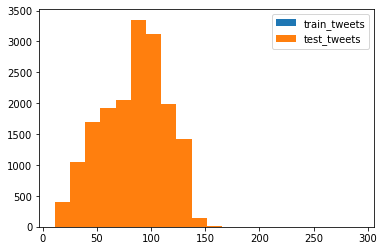

In [15]:
plt.hist(length_train, bins=40, label="train_tweets") 
plt.hist(length_test, bins=20, label="test_tweets") 
plt.legend() 
plt.show()

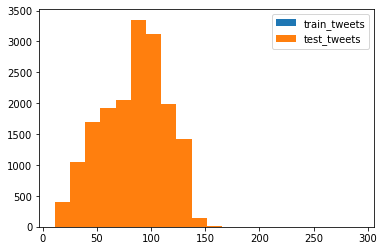

In [16]:
plt.hist(length_train, bins=20, label="train_tweets") 
plt.hist(length_test, bins=20, label="test_tweets") 
plt.legend() 
plt.show()


In [17]:
train_test = train.append(test, ignore_index=True) 

In [18]:
train_test.shape

(49159, 3)

In [19]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt

In [20]:
train_test['tidy_tweet'] = np.vectorize(remove_pattern)(train_test['tweet'], "@[\w]*")

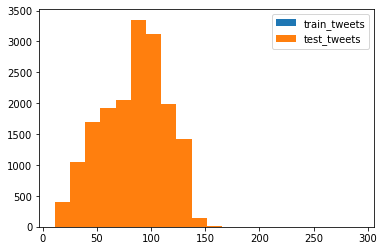

In [21]:
plt.hist(length_train, bins=40, label="train_tweets") 
plt.hist(length_test, bins=20, label="test_tweets") 
plt.legend() 
plt.show()

In [22]:
train_test.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


In [23]:
train_test['tidy_tweet'] = train_test['tidy_tweet'].str.replace("[^a-zA-Z#]", " ") 

In [24]:
train_test.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide society now #motivation


In [25]:
train_test(10)

TypeError: 'DataFrame' object is not callable

In [26]:
train_test['tidy_tweet'] = train_test['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))


In [27]:
train_test.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation


In [28]:
tokenized_tweet = train_test['tidy_tweet'].apply(lambda x: x.split())

In [29]:
tokenized_tweet.head()

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, cause, they, offer, wh...
2                              [bihday, your, majesty]
3                     [#model, love, take, with, time]
4                   [factsguide, society, #motivation]
Name: tidy_tweet, dtype: object

In [30]:
from nltk.stem.porter import * 
stemmer = PorterStemmer() 
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_tweet.head()

0    [when, father, dysfunct, selfish, drag, kid, i...
1    [thank, #lyft, credit, caus, they, offer, whee...
2                              [bihday, your, majesti]
3                     [#model, love, take, with, time]
4                         [factsguid, societi, #motiv]
Name: tidy_tweet, dtype: object

In [31]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])    
train_test['tidy_tweet'] = tokenized_tweet

In [32]:
all_words = ' '.join([text for text in train_test['tidy_tweet']]) 
from wordcloud import WordCloud 
wordcloud = WordCloud(width=800, height=500, random_state=22, max_font_size=110).generate(all_words) 
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

ModuleNotFoundError: No module named 'wordcloud'

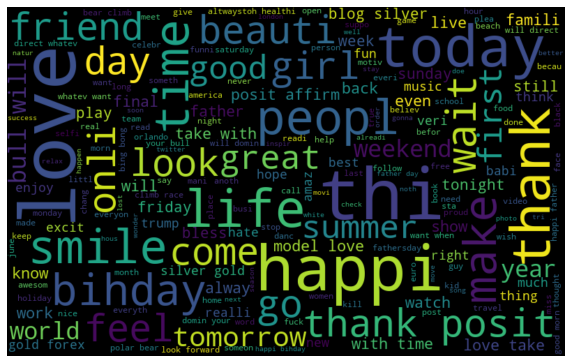

In [33]:
from wordcloud import WordCloud 
wordcloud = WordCloud(width=800, height=500, random_state=22, max_font_size=110).generate(all_words) 
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

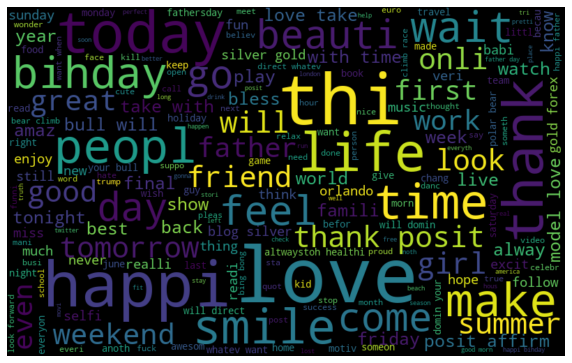

In [34]:
normal_words =' '.join([text for text in train_test['tidy_tweet'][train_test['label'] == 0]]) 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words) 
plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

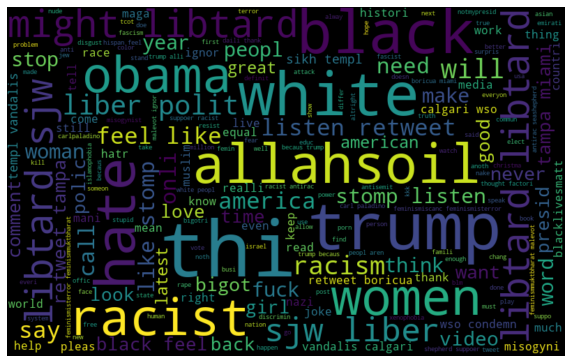

In [35]:
negative_words = ' '.join([text for text in train_test['tidy_tweet'][train_test['label'] == 1]]) 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(negative_words) 
plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

In [36]:
def hashtag_extract(x):
    hashtags = []  # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)
    return hashtags

In [37]:
HT_regular = hashtag_extract(train_test['tidy_tweet'][train_test['label'] == 0])

In [38]:
HT_negative = hashtag_extract(train_test['tidy_tweet'][train_test['label'] == 1])

In [39]:
HT_regular = sum(HT_regular, [])
HT_negative = sum(HT_negative, [])

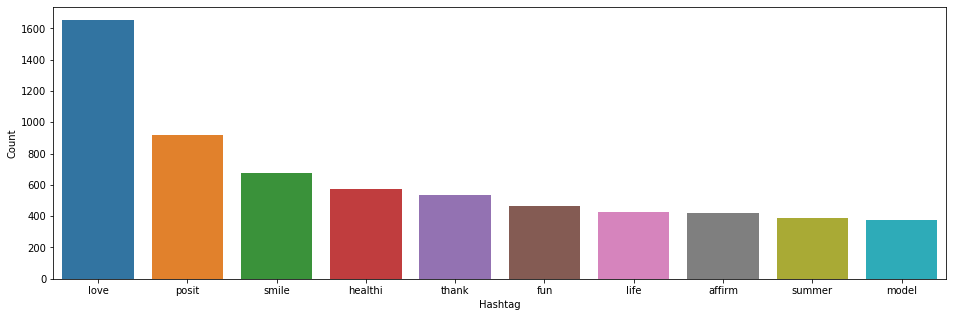

In [40]:
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

d = d.nlargest(columns="Count", n = 10)
plt.figure(figsize=(16, 5))
ax = sns.barplot(data=d, x = "Hashtag", y="Count")
ax.set(ylabel = 'Count')
plt.show()

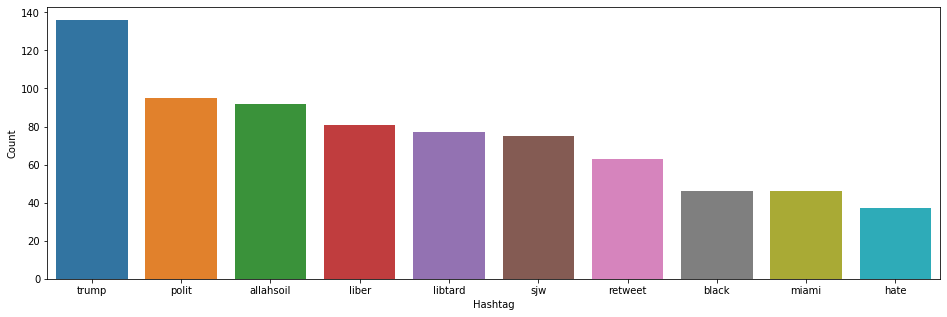

In [41]:
b = nltk.FreqDist(HT_negative)
e = pd.DataFrame({'Hashtag': list(b.keys()),
                  'Count': list(b.values())})

e = e.nlargest(columns="Count", n = 10)
plt.figure(figsize=(16, 5))
ax = sns.barplot(data=e, x = "Hashtag", y="Count")
ax.set(ylabel = 'Count')
plt.show()